# 04 Behavioral Modeling

**Behavioral Models**
- Model dynamic aspects of system
- Capture interactions between system elements
    - How structural parts act and interact
    - Message flow
    - How actions and interactions alter states


## 04-01 Connections
**Connection**
- Relationship between things such as items and parts
    - Has at least 2 ends, specifying the things related through a connection
    - To connect, we need ports

Eg. Charging our phone: Connect phone charging port to power outlet
- Parts: Phone, Power Source
    - Both parts need ports to connect to each other

**Port**
- Connection point that enables interaction between occurrences, most commonly parts

**Interface**
- Connection whose ends are restricted to being ports
    - Connections connect elements, Interfaces *only* connect ports

### OvenPowerSystem.sysml
- Oven has TerminalBlock
    - Connects to PowerSource
    - Connects to ControlBoard

In [59]:
package OvenPowerSystem{
    part def TerminalBlock;
    part def ControlBoard;
    
    part def Oven{
        // 2 features with respective part definitions
        part terminalBlock: TerminalBlock;
        part controlBoard: ControlBoard;
    }
}

Package OvenPowerSystem (63f7d9c7-e43e-429a-9da4-1eb9537a8810)


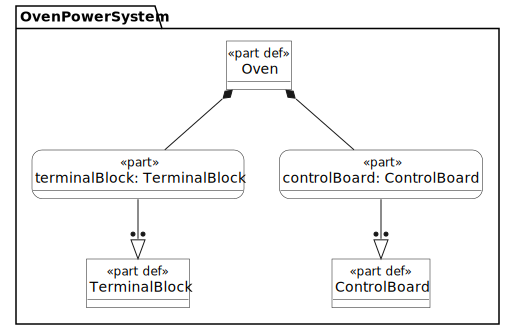

In [60]:
%viz --view=default OvenPowerSystem

### OvenItemPortsAndInterfaces.sysml

In [61]:
package OvenItemPortsAndInterfaces{
    item def Current;   // modeled as item as it is used but not part of Oven

// define which ports exist
    port def PowerPort{
        in item powerIn: Current;
        out item powerOut: Current;
        // direction can also be inout if port is bi-directional
        // type of port is Current, indicates current flows through port
    }

// define the interface (2+ ends, ports to be connected)
    interface def PowerInterface{
        end supplierPort: PowerPort;
        end consumerPort: ~PowerPort;
            // tilde `~` indicates conjugated port, same features as og but reverse direction
        flow of current: Current
            from supplierPort.powerOut
            to consumerPort.powerIn;
    }
}

Package OvenItemPortsAndInterfaces (7b5f60fa-4b7d-4edf-b735-63ff333c6daa)


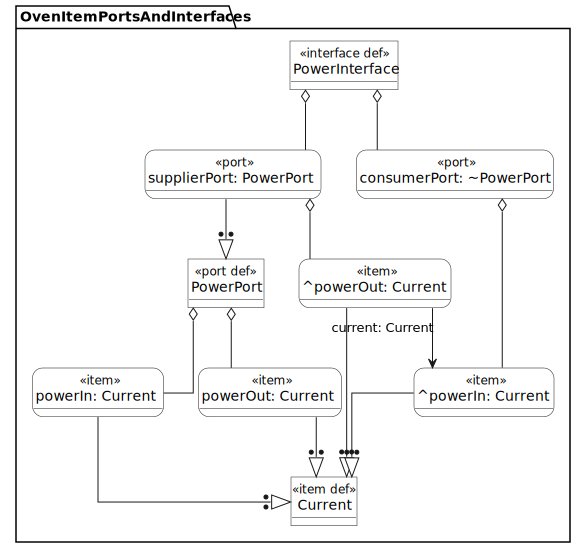

In [62]:
%viz --view=default --style=ORTHOLINE OvenItemPortsAndInterfaces

This view is a general view, providing a structural perspective

### OvenPowerSystemModel.sysml

##### PowerSystemDefs

In [94]:
package PowerSystemDefs{
    item def Current;
    part def TerminalBlock;
    part def ControlBoard;

    port def PowerPort{
        in item powerIn: Current;
        out item powerOut: Current;
    }

    interface def PowerInterface{
        end supplierPort: PowerPort;
        end consumerPort: ~PowerPort;
        flow of current: Current
            from supplierPort.powerOut
            to consumerPort.powerIn;
    }

    part def PowerIndicator;
    item def Signal;
    item def LED;

}

Package PowerSystemDefs (919a1f87-fda8-4664-a719-c5d6252a1a89)


In [91]:
package OvenPowerSystemModel{
    private import PowerSystemDefs::*;

    part def Oven{
        part terminalBlock: TerminalBlock{
            port powerPort: PowerPort;
        }
        part controlBoard: ControlBoard{
            port powerPort: ~PowerPort;
        }
        interface powerInterface: PowerInterface
            connect terminalBlock.powerPort
            to controlBoard.powerPort;
    }
}

Package OvenPowerSystemModel (df1e061a-166e-4faf-ba48-771c310a4474)


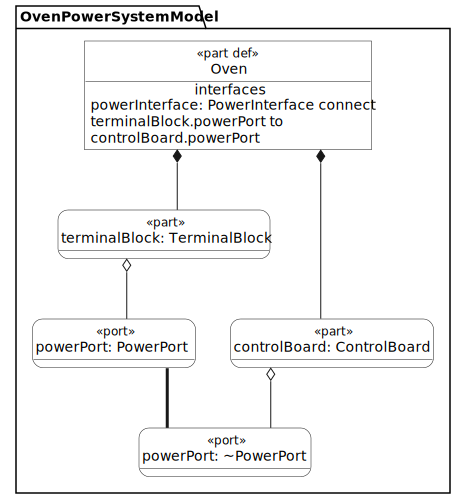

In [92]:
%viz --view=default --style=ORTHOLINE OvenPowerSystemModel

### InterconnectionViewOfInterface.sysml

Interconnection between parts can also be shown via --view=interconnection. Else in structural view, will be represented with a thick black line.
- Focuses on relationships and connections between system components

In [81]:
package InterconnectionViewOfInterface{
    private import PowerSystemDefs::*;

    interface def PowerInterface {
        end supplierPort: PowerPort;
        end consumerPort: ~PowerPort;
        flow of current: Current
            from supplierPort.powerOut
            to consumerPort.powerIn;
    }
}

Package InterconnectionViewOfInterface (05692242-1435-47cb-89c7-2ec1182e3e2b)


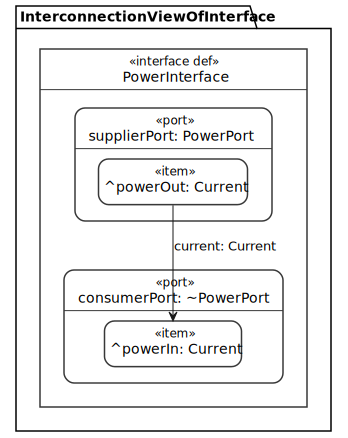

In [82]:
%viz --view=interconnection InterconnectionViewOfInterface 

Depending on the system, ports may be explicitly depicted as a small square with an arrow in it.

## 04-02 Flow Connections

Behavioral Model
1. Flow Connection
    1. Message
    2. Streaming flow connection
    3. Succession flow connection
2. Actions
3. States

**Flow Connections**
- Binary relationship between two ends (source, target)
- Action in which payload is tranferred from source to target
    - Payload can be anything: item, usage, part, etc
- Three types of flow connection usages
    1. Message
    2. Streaming flow connection
    3. Succession flow connection

### Message.sysml

**Message**
- Specifies transfer of payload from source to target w/o specifying transfer mechanism
- Most abstract level
- Eg: Oven Model
    - Oven has ControlBoard and PowerIndicator
    - ControlBoard sends Signal to PowerIndicator
        - Signal represents payload

In [106]:
package Message{
    private import PowerSystemDefs::*;

    occurrence PowerOn{
        part controlBoard: ControlBoard{
            event occurrence sendSignal;    // event of sending signal when power is on
        }
        part powerIndicator: PowerIndicator{
            event occurrence receiveSignal; // event of receiving signal when power is on
        }
        message of powerSignal: Signal
            from controlBoard.sendSignal
            to powerIndicator.receiveSignal;
    }
}

Package Message (a5101030-33b1-4cb5-b56a-6932a7a583b5)


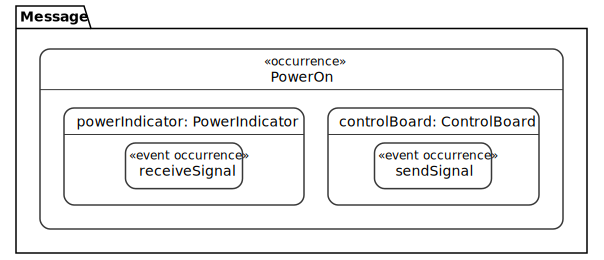

In [107]:
%viz --view=interconnection Message
// There's supposed to be an arrow from event occurrence sendSignal to the powerIndicator
// I don't know why it isn't showing up
// I think it's something specifically happening due to `message`, that it causes some form of PlantUML error

Occurrence is highest level of abstraction 
- Parts like PowerIndicator and ControlBoard are occurrences with spatial and temporal existence

**Event**
- A reference from one occurrence to annother occurrence that represents some relevant happening during the lifetime of the first occurrence

We can also see the sequence of flows using `--view=sequence`

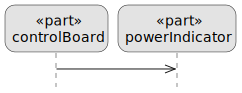

In [ ]:
%viz --view=sequence Message
// I also do not know why the messages are not named in the sequence view

### MessageFlow.sysml

In [95]:
package MessageFlow{
    private import PowerSystemDefs::*;

    occurrence PowerOn{
        part controlBoard: ControlBoard{
            event occurrence sendSignal;
        }
        part powerIndicator: PowerIndicator{
            event occurrence sendSignal;
            event occurrence receiveSignal;
        }

        message of powerSignal: Signal
            from controlBoard.sendSignal
            to powerIndicator.receiveSignal;

        message of switchOnLED: LED
            from powerIndicator.sendSignal
            to powerIndicator.receiveSignal;

        message of powerOffSignal: Signal
            from controlBoard.sendSignal
            to powerIndicator.receiveSignal;
        
        message of switchOffLED: LED
            from powerIndicator.sendSignal
            to powerIndicator.receiveSignal;
    }
}

Package MessageFlow (444491d3-a1a0-46ff-9f5b-0a11169f2114)


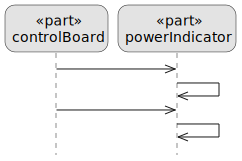

In [96]:
%viz --view=sequence MessageFlow 

**Sequence View**
- Chronological exchange of messages among 2+ elements over a period of time
    - Horz: Parts
    - Vert: Time
    - Arrows: Flow of messages

### StreamingFlow.sysml

**Flow Connections**
1. Message
2. Streaming flow connection
3. Succession flow connection

**Streaming Flow**
- Specifies transfer if payload from source to target & id's source output feature and target input feature

In [98]:
package StreamingFlow{
    private import PowerSystemDefs::*;
    
    part def Oven{
        part terminalBlock: TerminalBlock{
            out powerOut: Current;      // out & in indicate direction of usage
        }
        part controlBoard: ControlBoard{
            in powerIn: Current;
        }
        flow powerFlow of current:Current
            from terminalBlock.powerOut
            to controlBoard.powerIn;
            // NOTE: No ports
    }
}

Package StreamingFlow (79221773-21bf-443a-b37c-98370101e129)


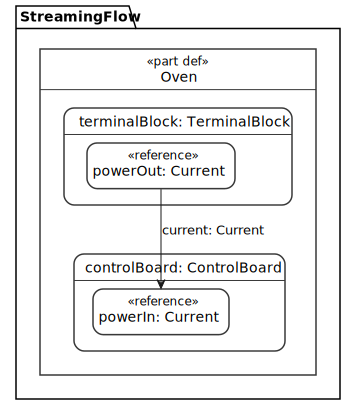

In [100]:
%viz --view=interconnection StreamingFlow

### SuccessionFlow.sysml

**Succession Flow**
- Flow with constraint that source must complete before transfer starts & transfer must complete before target starts
- Visually depicted with a dotted arrow

Example: Coffee Machine
1. Fill Water
    1. Water must fill reservoir before machine can brew
2.  Brew Coffee 

In [102]:
package SuccessionFlow{
    action def BrewCoffee{
        action fill{
            out water;
        }
        action brew{
            in water;
        }
        succession flow
            fill.water to brew.water;
    }
}

Package SuccessionFlow (6a84f427-64e1-4d67-99f5-70caea7c539d)


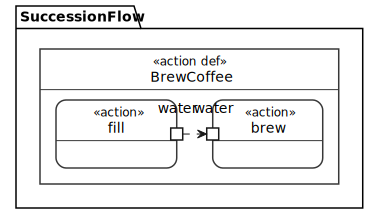

In [105]:
%viz --view=interconnection --style=LR SuccessionFlow

## 04-03 Action

**Behavioral Model**
1. Flow Connection
2. Actions
3. States

**Action**
- An occurrence performed over time that has optional features with directional parameters `in`, `out` or `inout`
- Best viewed using `--view=action`

### SuccessionFlow.sysml

In [108]:
package SuccessionFlow{
    action def BrewCoffee{
        action fill{
            out water;
        }
        action brew{
            in water;
        }
        succession flow
            fill.water to brew.water;
    }
}

Package SuccessionFlow (c34c1f63-fb5f-46b8-97ad-36d8e2dec5e1)


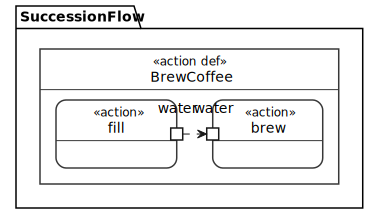

In [109]:
%viz --view=interconnection --style=LR SuccessionFlow

**Action Flow View**
- Behavioral view showing a sequence of actions with inputs and outputs
- Can include successions, control nodes, send and accept actions as specialized notations

### ActionForkAndJoin.sysml
- Define actions and control nodes
- Sequence actions
    - Succession action `first _____ then ______`
        - `start` and `done` are native actions that are available by default
            - start is a solid circle
            - done is a bullet within a hollow circle
        - `fork` and `joinNode` are nodes. `fork` is undeclared in this instance as it is only used once in the script
    - A semicolon must be used in between `first/then` clause if one of the statements uses a special keyword (`fork`, `join`)
    - At fork, 2+ successions follow
    - Joining requires a statement for each action from the fork
        - Since this is sequential, actions must be completed before join

In [113]:
package ActionForkAndJoin{
    action def testOven{
        // actions and control nodes
        action powerOn;
        action setTemperature;
        action setTimer;
        action monitorOven;
        join joinNode;

        // sequence of actions
        first start then powerOn; // expresses succession action, `start` and `done` are natively defined in sysml

        first powerOn;
        then fork;  // fork actions
        then setTemperature;
        then setTimer;

        first setTemperature then joinNode; // join action 1
        first setTimer then joinNode;   // join action 2

        first joinNode then monitorOven;
        
        first monitorOven then done;
    }
}

Package ActionForkAndJoin (0c2acd13-3efc-4ea6-baa5-2ce6f8fd3fd9)


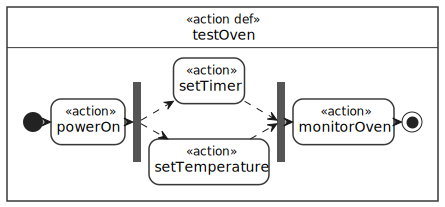

In [115]:
%viz --view=action --style=LR ActionForkAndJoin